In [2]:
import sys, os, pygmt, importlib, re
mod_path = '/home/581/da1339/AFIM/src/AFIM/src'
sys.path.insert(0, mod_path)
from sea_ice_toolbox            import SeaIceToolbox
from datetime                   import timedelta, date, datetime
from pathlib                    import Path
from dask.distributed           import Client, LocalCluster
import numpy                    as np
import pandas                   as pd
import xarray                   as xr
import xesmf                    as xe
from collections                import defaultdict
import matplotlib.pyplot        as plt
from scipy.interpolate          import interp1d
from matplotlib.offsetbox       import AnchoredOffsetbox, VPacker, TextArea
import matplotlib.dates         as mdates
from pyproj                     import CRS, Transformer

In [19]:
import sea_ice_toolbox
importlib.reload(sea_ice_toolbox)
from sea_ice_toolbox  import SeaIceToolbox

In [24]:
sim_name   = "elps-min"
dt0_str    = "1993-01-01"
dtN_str    = "1999-12-31"
dt_rng_str = f"{dt0_str[:4]}-{dtN_str[:4]}"
#ispd_str        = f"{ispd_thresh:.1e}".replace("e-0", "e-")
#smooth_FIA_days = 15
SIA_dict = {}
FIA_dict = {}
SI_tools = SeaIceToolbox(sim_name             = sim_name,
                         dt0_str              = dt0_str,
                         dtN_str              = dtN_str,
                         ice_speed_threshold  = 5e-4,
                         ice_speed_type       = "ispd_BT",
                         ice_type             = "FI_BT",
                         overwrite_zarr       = False,
                         save_new_figs        = True,
                         show_figs            = True,
                         overwrite_saved_figs = True)

2025-06-12 09:30:01,895 - INFO - hemisphere initialised: SH


In [25]:
af2020_df                = pd.read_csv(SI_tools.AF_FI_dict['P_AF2020_cli_csv'])
FIA_dict["AF2020db_cli"] = SI_tools.interpolate_obs_fia(af2020_df)
ice_types                = [ice_type, f"{ice_type}_roll", f"{ice_type}_bool"]

/g/data/gv90/da1339/afim_output/elps-min/zarr/ispd_thresh_5.0e-4/metrics/FI_BT_mets.zarr exists and not overwriting--loading
/g/data/gv90/da1339/afim_output/elps-min/zarr/ispd_thresh_5.0e-4/metrics/FI_BT_roll_mets.zarr exists and not overwriting--loading
/g/data/gv90/da1339/afim_output/elps-min/zarr/ispd_thresh_5.0e-4/metrics/FI_BT_bool_mets.zarr exists and not overwriting--loading


INFO:pyogrio._io:Created 357 records
INFO:pyogrio._io:Created 357 records
2025-06-12 09:30:53,896 - INFO - Saved figure to /g/data/gv90/da1339/GRAPHICAL/AFIM/elps-min/FIA_FIP_elps-min_1993-1999.png
INFO:elps-min:Saved figure to /g/data/gv90/da1339/GRAPHICAL/AFIM/elps-min/FIA_FIP_elps-min_1993-1999.png


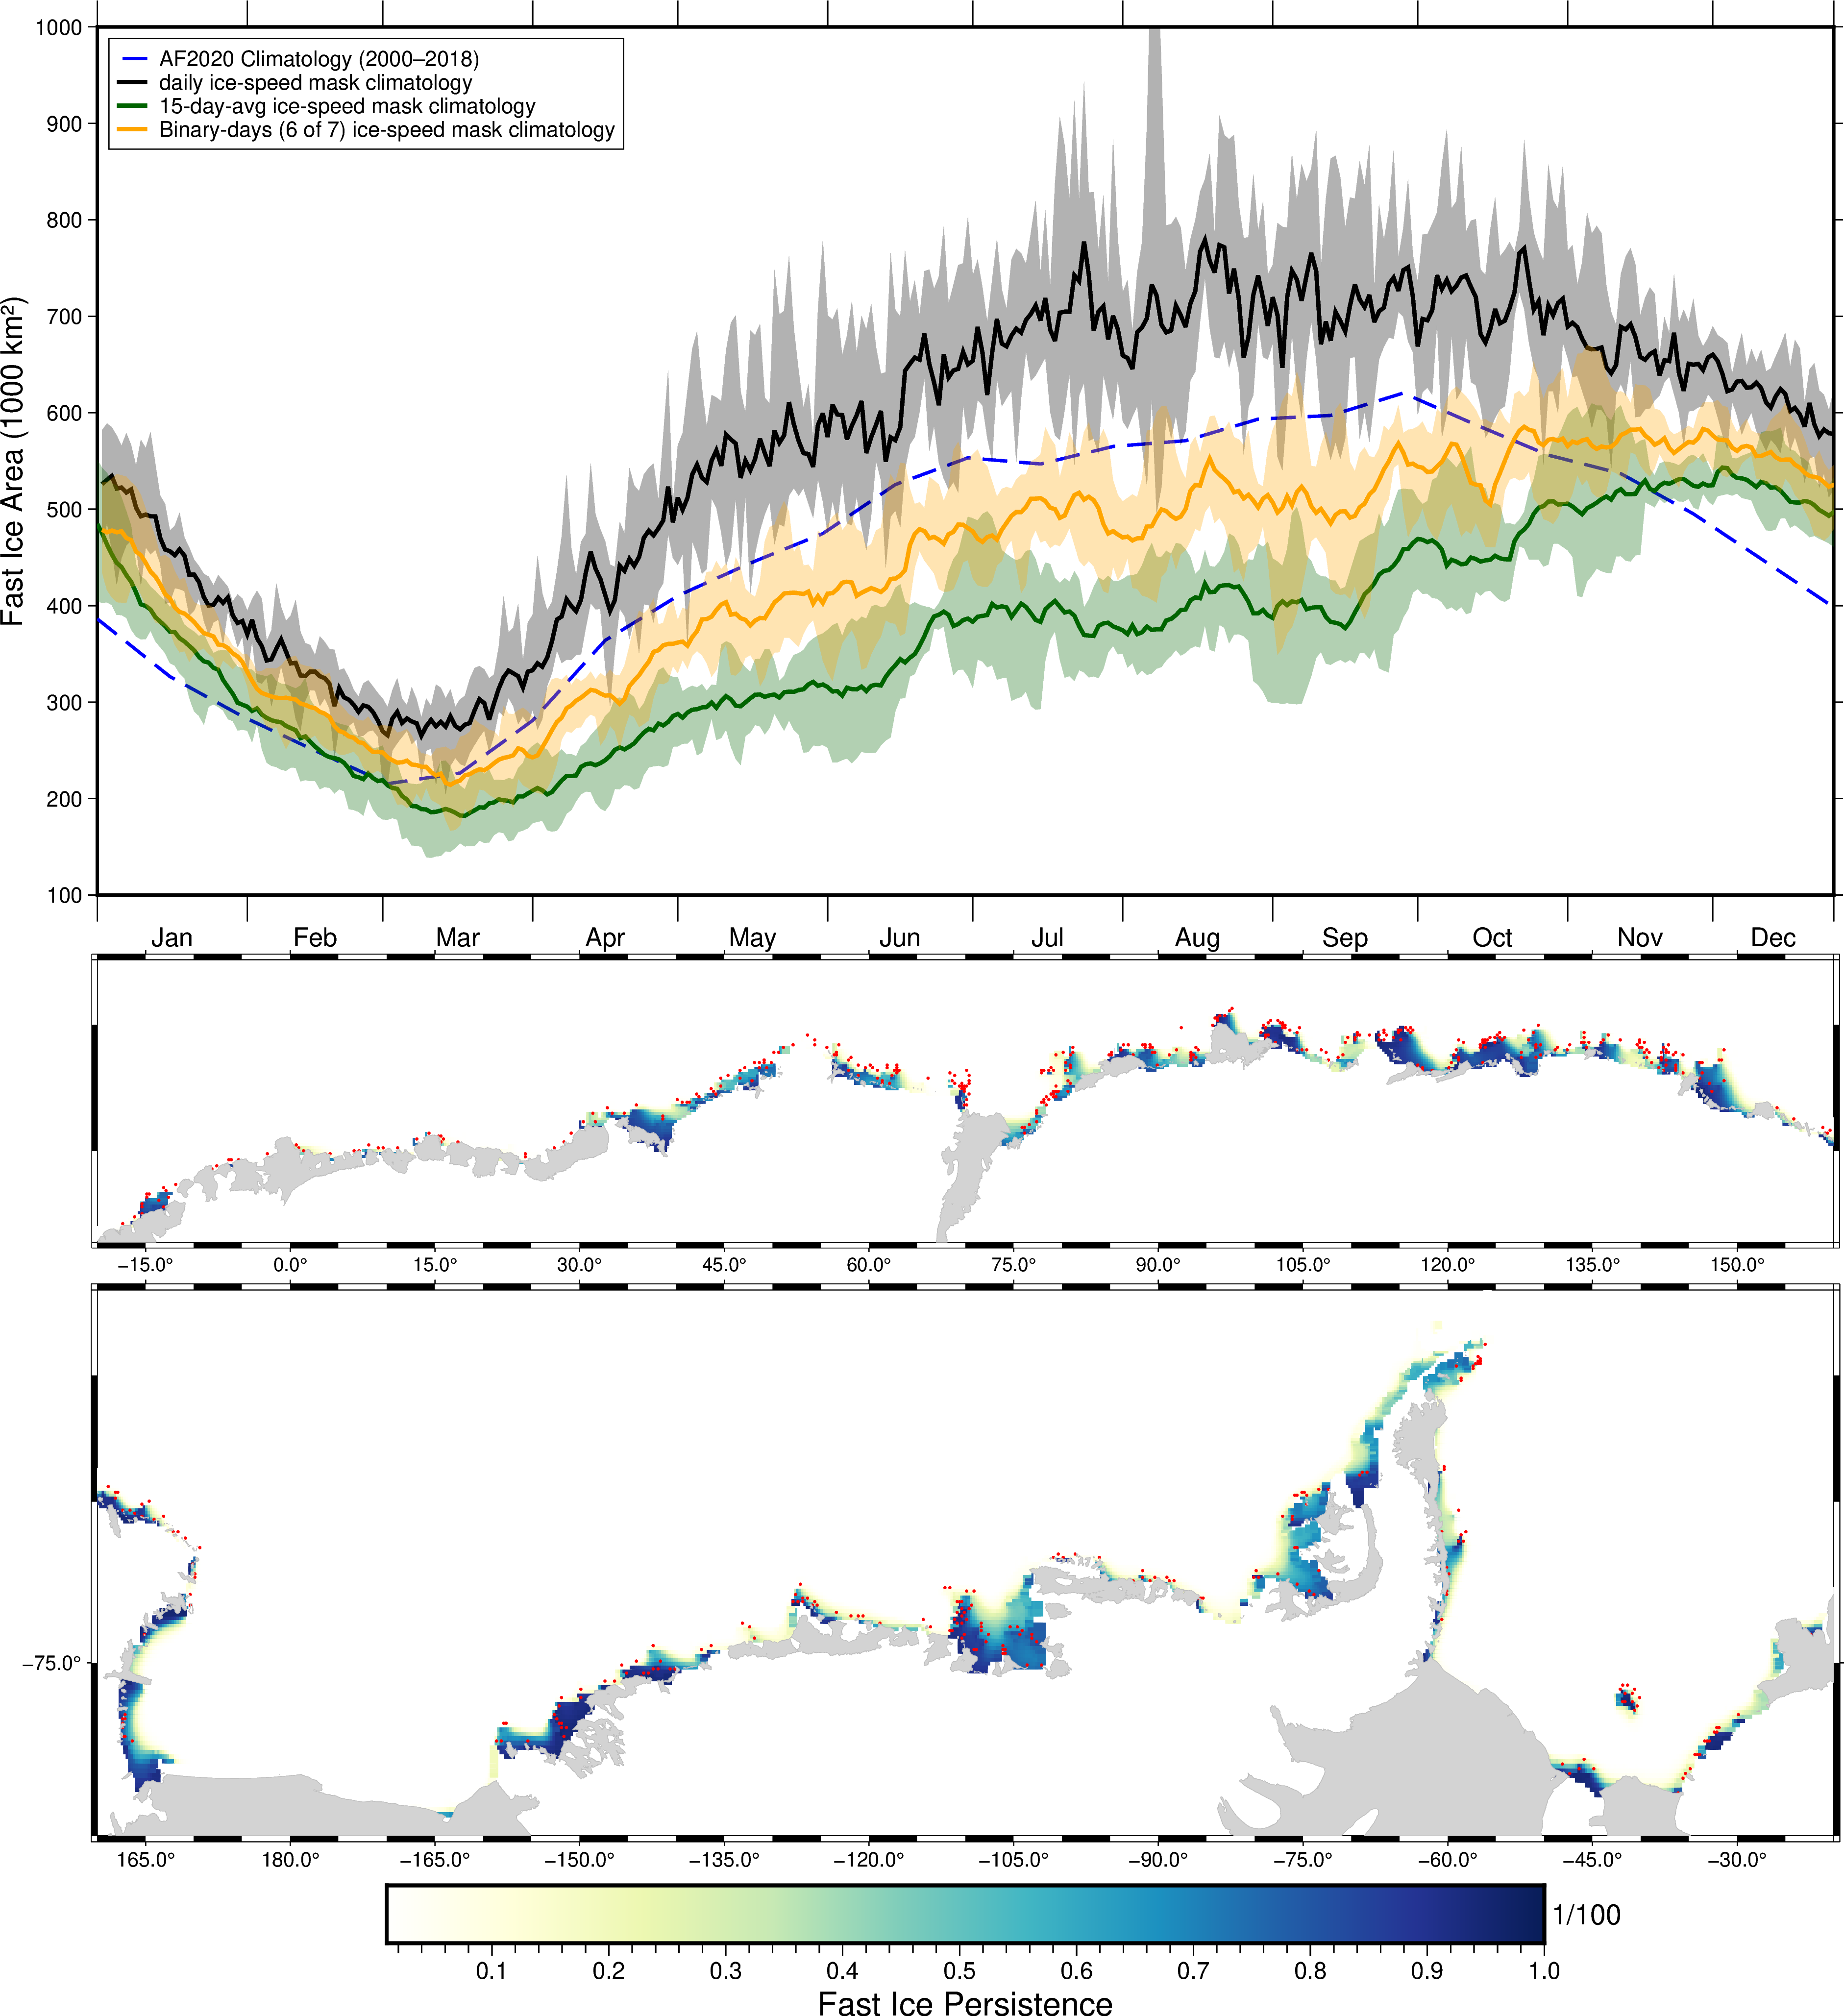

In [28]:
for i_type in ice_types:
    P_METS = Path(SI_tools.D_metrics, f"{i_type}_mets.zarr")
    P_sum  = Path(SI_tools.D_metrics, f"{i_type}_summary.csv")
    if P_METS.exists() and not SI_tools.overwrite_zarr_group:
        print(f"{P_METS} exists and not overwriting--loading")
        METS             = xr.open_zarr(P_METS)
        FIA_dict[i_type] = METS['FIA']
    else:
        print(f"{P_METS} does NOT exists and/or overwriting--computing")
        roll        = i_type.endswith("_roll")
        DS, CICE_SO = SI_tools.load_processed_cice(ispd_thresh = ispd_thresh,
                                                  ice_type    = ice_type,
                                                  zarr_CICE   = True,
                                                  rolling     = roll,
                                                  slice_hem   = True)
        if i_type==f"{ice_type}_bool":
            bool_mask          = SI_tools.boolean_fast_ice(DS['FI_mask'], dim="time", window=7, min_count=6)
            DS_bool            = CICE_SO.where(bool_mask)
            DS_bool["FI_mask"] = DS["FI_mask"]
            DS                 = DS_bool
        METS = SI_tools.compute_sea_ice_metrics(DS, sim_name, i_type, SI_tools.ispd_thresh_str, P_METS, P_sum, FIA_dict["AF2020db_cli"])
    FIA_dict[i_type] = METS['FIA']
P_png = Path(SI_tools.D_graph, sim_name, f"FIA_FIP_{sim_name}_{dt_rng_str}.png")
SI_tools.plot_FIA_FIP_faceted(FIA_dict, METS['FIP'], P_png=P_png, plot_GI=True)

In [5]:
var_name = "hi"

In [6]:
DS, CICE = SI_proc.load_processed_cice(ispd_thresh = ispd_thresh,
                                       ice_type    = ice_type,
                                       zarr_CICE   = True,
                                       rolling     = False,
                                       slice_hem   = False)
CICE_ispds  = SI_proc.compute_ice_speed_types( CICE , ['ispd_BT'] )
CICE_reM    = SI_proc.reapply_landmask( CICE_ispds )
CICE_reM['ispd_BT'] = SI_proc.compute_composite_ice_speed( CICE_reM )

2025-06-11 20:36:53,591 - INFO - 📁 Found 84 zarr files: ['cice_daily_1993-01.zarr', 'cice_daily_1993-02.zarr', 'cice_daily_1993-03.zarr', 'cice_daily_1993-04.zarr', 'cice_daily_1993-05.zarr', 'cice_daily_1993-06.zarr', 'cice_daily_1993-07.zarr', 'cice_daily_1993-08.zarr', 'cice_daily_1993-09.zarr', 'cice_daily_1993-10.zarr', 'cice_daily_1993-11.zarr', 'cice_daily_1993-12.zarr', 'cice_daily_1994-01.zarr', 'cice_daily_1994-02.zarr', 'cice_daily_1994-03.zarr', 'cice_daily_1994-04.zarr', 'cice_daily_1994-05.zarr', 'cice_daily_1994-06.zarr', 'cice_daily_1994-07.zarr', 'cice_daily_1994-08.zarr', 'cice_daily_1994-09.zarr', 'cice_daily_1994-10.zarr', 'cice_daily_1994-11.zarr', 'cice_daily_1994-12.zarr', 'cice_daily_1995-01.zarr', 'cice_daily_1995-02.zarr', 'cice_daily_1995-03.zarr', 'cice_daily_1995-04.zarr', 'cice_daily_1995-05.zarr', 'cice_daily_1995-06.zarr', 'cice_daily_1995-07.zarr', 'cice_daily_1995-08.zarr', 'cice_daily_1995-09.zarr', 'cice_daily_1995-10.zarr', 'cice_daily_1995-11.zarr'

In [ ]:
CICE_reM

In [151]:
ds_slice = CICE_reM.isel(time=2400, nj=SI_proc.hemisphere_dict['nj_slice'])
plt_da   = ds_slice[var_name]
SIA = SI_proc.compute_ice_area( ds_slice['aice'] , ds_slice['tarea'] , ice_area_scale=SI_proc.SIC_scale )
SIA.values

2025-06-11 18:08:48,194 - INFO - hemisphere initialised: SH
INFO:elps-min:hemisphere initialised: SH
2025-06-11 18:08:48,431 - INFO - 66791608021.64 m^2 total circumpolar grounded iceberg area for elps-min
INFO:elps-min:66791608021.64 m^2 total circumpolar grounded iceberg area for elps-min
2025-06-11 18:08:48,433 - INFO - 🧮 Spatially-integrating the product of sea ice concentrations and grid cell areas
INFO:elps-min:🧮 Spatially-integrating the product of sea ice concentrations and grid cell areas


array(16.706612, dtype=float32)

In [182]:
dt = pd.Timestamp( da.time.values )
dt_str = f"{dt.year}-{dt.month:02d}-{dt.day:02d}"
SI_plot.pygmt_map_plot_one_var(plt_da, var_name, 
                               plot_regions = 2,
                               time_stamp   = dt_str,
                               tit_str      = dt_str,
                               plot_GI      = True,
                               var_sq_size  = 0.3,
                               series       = (0,2),
                               GI_fill_color = 'blue', 
                               GI_sq_size    = 0.05,
                               extend_cbar   = True)

2025-06-11 18:32:32,387 - INFO - method will plot two Antarctic sectors regional dictionary
INFO:elps-min:method will plot two Antarctic sectors regional dictionary
makecpt [ERROR]: gmt_truncate_cpt: z_high = 2 larger than highest z (1)
plot [ERROR]: Option -C: No CPT given


GMTCLibError: Module 'plot' failed with status code 72:
plot [ERROR]: Option -C: No CPT given

In [ ]:
#sim_names       = SI_proc.config.get('sim_dict').keys()
#SI_proc.correct_timestamp_for_all_monthly_zarr_iceh( sim_names=sim_names, dry_run=False )
SI_proc.daily_iceh_to_monthly_zarr(overwrite=overwrite_zarr, delete_original=delete_original)
NSIDC             = SI_proc.compute_NSIDC_metrics()
SIA_dict['NSIDC'] = NSIDC['SIA']
# if daily:
#     DS_daily = SI_proc.process_daily_cice(ispd_type            = ispd_types,
#                                           overwrite_zarr_group = overwrite_zarr)
# if rolling:
#     DS_roll = SI_proc.process_rolling_cice(mean_period          = roll_period,
#                                            ispd_type            = ispd_types,
#                                            overwrite_zarr_group = overwrite_zarr)
DS, CICE_SO       = SI_proc.load_processed_cice(ispd_thresh = ispd_thresh,
                                          ice_type    = ice_types[0],
                                          zarr_CICE   = True,
                                          rolling     = True if ice_types[0]==f"{ice_types[0]}_roll" else False,
                                          slice_hem   = True)
SIA_dict[sim_name] = SI_proc.compute_ice_area(CICE_SO['aice'], CICE_SO['tarea'], ice_area_scale=SI_proc.SIC_scale)
SI_plot.plot_monthly_ice_area_by_year(SIA_dict,
                                      ice_type = "SI",
                                      tit_str  = tit_str,
                                      P_png    = P_png,
                                      ylim     = (1,20))

In [ ]:
SI_proc.sim_config

In [ ]:
#FIA_dict[sim_name]       = SI_proc.compute_ice_area(DS['aice'], DS['tarea']).compute()
#tit_str = f"Fast Ice Area Southern Ocean, {dt_rng_str}, AF2020db Climatology and Station Names: {sim_name}"
ktens    = SI_proc.sim_config['Ktens']
elps     = SI_proc.sim_config['e_yieldcurve']
ndte     = SI_proc.sim_config['ndte']
Cf       = SI_proc.sim_config['Cf']
GI_thin  = 1 - SI_proc.sim_config['GI_thin_fact']
#Pstar = float(SI_proc.sim_config['Pstar'].replace("D", "E"))
tit_str  = f"simulation name: {sim_name}\ntested CICE namelist parameter: Rothrock Strength Formulation; Cf={Cf}, ktens={ktens}, e={elps}, GI-concentration={GI_thin:0.2f};"
P_png    = Path(SI_plot.D_graph, "timeseries", f"FIA_AF2020db_and_{sim_name}_{dt_rng_str}.png")
SI_plot.plot_monthly_ice_area_by_year(FIA_dict,
                                      ice_type = "FI",
                                      tit_str  = tit_str,
                                      P_png    = P_png)